In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df=pd.read_csv('/content/gdrive/MyDrive/datasettt.csv')

In [3]:
df

,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,MentalHealth,label
0,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,25.0,4.0,0.0,1304.0,NaN,['LongCovid'],1,0,mild
1,2022-12-31 23:38:08+00:00,elusivechantues,This year I \n-survived 6 months &amp; countin...,2.0,0.0,0.0,89.0,NaN,['LongCovid'],1,0,mild
2,2022-12-31 22:57:50+00:00,loscharlos,Ok these were my favorite shows I watched in 2...,148.0,12.0,36.0,18852.0,NaN,['LongCovid'],1,0,mild
3,2022-12-31 22:57:35+00:00,pegsatthemovies,Wish today was more celebratory for me. 2yrs o...,3.0,0.0,0.0,196.0,NaN,['LongCovid'],1,0,moderate
4,2022-12-31 22:50:29+00:00,Peggles12,No celebrating today as two yrs ago at 7:30pm ...,584.0,66.0,27.0,22340.0,NaN,['LongCovid'],1,0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
38711,2020-08-13 13:42:42+00:00,lellielesley,"@lmarsh77291701 Yes, that's the assumption. I ...",0.0,0.0,1.0,NaN,NaN,"['covid19', 'LongCovid']",1,0,severe
38712,2020-08-13 09:25:01+00:00,ClaireC73758037,"We've just completed a mile walk, bit of a uph...",1.0,0.0,0.0,NaN,NaN,"['longcovid', 'covidrecovery', 'longhaulers']",1,0,severe
38713,2020-08-13 00:31:57+00:00,Matzuma_Li,#Covid19 #LongHauler here. BotH my husband &am...,1.0,0.0,1.0,NaN,NaN,"['Covid19', 'LongHauler', 'LongCovid']",1,0,severe
38714,2020-08-12 21:19:42+00:00,amymitchellart,@veryvirology Both masks and medication. Preve...,3.0,0.0,2.0,NaN,NaN,['LongCovid'],1,0,severe


In [4]:
print("number of tweets: {}".format(len(df)))

number of tweets: 38716


**pyplot помага да се разбере и да се претстави како твитовите се дистрибуираат во датасетот**

*   List item
*   List item



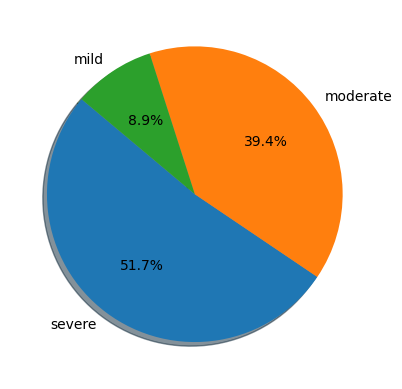

In [5]:
import matplotlib.pyplot as plt

sentiment_count = df["label"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()


Датасетот е релативно добро распределен.

In [6]:
print("Number of mild tweets: {}".format(df[df['label']=="mild"].count()[0]))

Number of mild tweets: 3463


In [7]:
print("Number of severe tweets: {}".format(df[df['label']=="severe"].count()[0]))

Number of severe tweets: 20000


In [8]:
print("Number of moderate tweets: {}".format(df[df['label']=="moderate"].count()[0]))

Number of moderate tweets: 15253


In [9]:
import re

In [10]:
def clean_tweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [11]:
def clean_user(tweet, default_replace="user"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [12]:
def clean_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+',default_replace, tweet )
  return tweet

In [13]:
def clean_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+',default_replace, tweet)
  return tweet

In [14]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [15]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+',r'\1\1',tweet)
  return tweet

In [16]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.5 MB/s eta 0:00:00


In [17]:
import contractions

def fix_contractions(tweet):
  for k,v in contractions.contractions_dict.items():
    tweet = tweet.replace(k,v)
    return tweet

In [18]:
#
tweet = "brother i like this @aleksandar #cool"

print("Processed: {}".format(clean_user(tweet)))

Processed: brother i like this user #cool


In [19]:
pip install nltk

In [20]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [22]:
tweet = "brother i like this @aleksandar #cool"
print("Tweet tokens: {}".format(tokenize(tweet)))

Tweet tokens: ['brother', 'i', 'like', 'this', '@', 'aleksandar', '#', 'cool']


In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
tokens = ["international","companies","had","interns"]


In [25]:
word_type = {"international":wordnet.ADJ,
             "companies":wordnet.NOUN,
             "had":wordnet.VERB,
             "interns":wordnet.NOUN
}

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
def lemmatize_tokens(tokens,word_type,lemmatizer):
  token_list=[]
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token,word_type[token]))


  return token_list

In [28]:
print("Tweet lemma: {}".format(lemmatize_tokens(tokens,word_type,lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


In [29]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer



In [30]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

In [31]:
def stem_tokens(tokens,stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [32]:
def func_tweet(tweet,verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))
  tweet = clean_tweet(tweet)
  tweet = clean_user(tweet)
  tweet = clean_url(tweet)
  tweet = clean_hashtag(tweet)


  if verbose: print("Post Twitter processing tweet: {}".format(tweet))
  tweet = to_lowercase(tweet)
  tweet = fix_contractions(tweet)

  tweet = word_repetition(tweet)




  if verbose: print("Post Twitter processing tweet: {}".format(tweet))
 #Tokenization & Stemming

  tokens = tokenize(tweet)
  stemmer = SnowballStemmer('english')
  stem = stem_tokens(tokens,stemmer)




  return stem


In [33]:
pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 84.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [34]:
df.head()


,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,MentalHealth,label
0,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,25.0,4.0,0.0,1304.0,NaN,['LongCovid'],1,0,mild
1,2022-12-31 23:38:08+00:00,elusivechantues,This year I \n-survived 6 months &amp; countin...,2.0,0.0,0.0,89.0,NaN,['LongCovid'],1,0,mild
2,2022-12-31 22:57:50+00:00,loscharlos,Ok these were my favorite shows I watched in 2...,148.0,12.0,36.0,18852.0,NaN,['LongCovid'],1,0,mild
3,2022-12-31 22:57:35+00:00,pegsatthemovies,Wish today was more celebratory for me. 2yrs o...,3.0,0.0,0.0,196.0,NaN,['LongCovid'],1,0,moderate
4,2022-12-31 22:50:29+00:00,Peggles12,No celebrating today as two yrs ago at 7:30pm ...,584.0,66.0,27.0,22340.0,NaN,['LongCovid'],1,0,moderate


In [35]:
mapping = {
    "mild":1,
    "moderate":0,
    "severe":2

}

In [36]:
df["tokens"] = df["text"].apply(func_tweet)
df["tweet_sentiment"] = df["label"].map(mapping)
df.head(10)

,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,MentalHealth,label,tokens,tweet_sentiment
0,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,25.0,4.0,0.0,1304.0,NaN,['LongCovid'],1,0,mild,"[so, thank, for, new, friendship, i, ve, made,...",1
1,2022-12-31 23:38:08+00:00,elusivechantues,This year I \n-survived 6 months &amp; countin...,2.0,0.0,0.0,89.0,NaN,['LongCovid'],1,0,mild,"[this, year, i, -surviv, 6, month, &, amp, ;, ...",1
2,2022-12-31 22:57:50+00:00,loscharlos,Ok these were my favorite shows I watched in 2...,148.0,12.0,36.0,18852.0,NaN,['LongCovid'],1,0,mild,"[ok, these, were, my, favorit, show, i, watch,...",1
3,2022-12-31 22:57:35+00:00,pegsatthemovies,Wish today was more celebratory for me. 2yrs o...,3.0,0.0,0.0,196.0,NaN,['LongCovid'],1,0,moderate,"[wish, today, was, more, celebratori, for, me,...",0
4,2022-12-31 22:50:29+00:00,Peggles12,No celebrating today as two yrs ago at 7:30pm ...,584.0,66.0,27.0,22340.0,NaN,['LongCovid'],1,0,moderate,"[no, celebr, today, as, two, yrs, ago, at, 7:3...",0
5,2022-12-31 22:24:32+00:00,LongCovidComms,"At the 2021 I really felt like saying ""Good ri...",2.0,0.0,0.0,127.0,NaN,['longcovid'],1,0,mild,"[at, the, 2021, i, realli, felt, like, say, ``...",1
6,2022-12-31 19:49:30+00:00,TritonTheBadman,@profnfenton @jengleruk I know so many people ...,1.0,0.0,1.0,110.0,NaN,['Longcovid'],1,0,moderate,"[user, user, i, know, so, mani, peopl, who, ha...",0
7,2022-12-31 19:40:09+00:00,Kurtzer_MD,@GeoEduOne @LaRougeAbeille I’m so sorry! It wa...,2.0,0.0,0.0,112.0,NaN,"['ME', 'longcovid']",1,0,moderate,"[user, user, i, ’, m, so, sorri, !, it, was, m...",0
8,2022-12-31 19:12:59+00:00,SassyIsMe1961,@OmarRiverosays It’s too bad he didn’t tell us...,4.0,1.0,0.0,39.0,NaN,['LongCovid'],1,0,moderate,"[user, it, ’, s, too, bad, he, didn, ’, t, tel...",0
9,2022-12-31 17:12:51+00:00,wastelessme,Final walk of 22 - I won’t be sad to wave good...,11.0,0.0,1.0,281.0,NaN,"['LongCovid', 'smallsteps', 'HappyNewYear']",1,0,mild,"[final, walk, of, 22, -, i, won, ’, t, be, sad...",1


In [37]:
columns_to_delete = ["LikeCount", "RetweetCount", "Place", "ReplyCount", "ViewCount"]
df = df.drop(columns=columns_to_delete)


In [38]:
df.head()


,Date,User,text,Hashtags,PCS_patient,MentalHealth,label,tokens,tweet_sentiment
0,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,['LongCovid'],1,0,mild,"[so, thank, for, new, friendship, i, ve, made,...",1
1,2022-12-31 23:38:08+00:00,elusivechantues,This year I \n-survived 6 months &amp; countin...,['LongCovid'],1,0,mild,"[this, year, i, -surviv, 6, month, &, amp, ;, ...",1
2,2022-12-31 22:57:50+00:00,loscharlos,Ok these were my favorite shows I watched in 2...,['LongCovid'],1,0,mild,"[ok, these, were, my, favorit, show, i, watch,...",1
3,2022-12-31 22:57:35+00:00,pegsatthemovies,Wish today was more celebratory for me. 2yrs o...,['LongCovid'],1,0,moderate,"[wish, today, was, more, celebratori, for, me,...",0
4,2022-12-31 22:50:29+00:00,Peggles12,No celebrating today as two yrs ago at 7:30pm ...,['LongCovid'],1,0,moderate,"[no, celebr, today, as, two, yrs, ago, at, 7:3...",0


In [39]:
x = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor = lambda x: x,
                            tokenizer=lambda x: x)

  tf_vect.fit(tweet_corpus)
  return tf_vect

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train , X_test , y_train , y_test = train_test_split(x,y,random_state=0, train_size=0.80)

In [44]:
import random

In [45]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment t: {}".format(y_train[id]))


Train tweet: ['my', 'new', 'game', 'is', 'see', 'how', 'low', 'i', 'can', 'keep', 'my', 'hr', 'while', 'still', 'technic', 'jog', '.', '🐢', '🐌', '🦥', 'hr', 'was', 'be', 'jumpi', 'the', 'whole', 'time', ',', 'not', 'sure', 'whi', '.', 'longcovid']
Sentiment t: 2


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace with your actual data
x = df["tokens"].tolist()  # List of tokenized tweets
y = df["tweet_sentiment"].tolist()  # List of sentiment labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert tokens back to text for TfidfVectorizer
X_train_text = [' '.join(tokens) for tokens in X_train]
X_test_text = [' '.join(tokens) for tokens in X_test]

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Create a multi-class Logistic Regression model
model = LogisticRegression(multi_class='ovr', max_iter=100)  # Using 'ovr' for one-vs-rest
model.fit(X_train_tfidf, y_train)

# Predict sentiment labels
y_pred = model.predict(X_test_tfidf)

print("Multi-class Logistic Regression Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Multi-class Logistic Regression Accuracy: 70.65%
Confusion Matrix:
 [[1965   35 1140]
 [ 183  131  332]
 [ 552   31 3375]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},
